In [6]:
import os, sys, importlib

In [7]:
sys.path.append("../Functions")

In [8]:
sys.path.append("../Models")

In [9]:
from preprocessing_functions import *
from performance_functions import *
from aggregate_functions import *

In [10]:
from facebook_prophet import rolling_prophet

In [11]:
import pickle
import matplotlib.pyplot as plt

In [12]:
series_name = "dummy_series"
data = "dummy_data.csv"

In [13]:
app_data = read_file(data)

In [14]:
ts_data = preprocess(app_data, series_name)
ts_data_weekly = resample(ts_data, "W")
ts_data_weekly = ts_data_weekly.iloc[:-1]
ts_data_weekly.tail(2)

,Daily,dummy_series
94,2022-10-23,4810.990840
95,2022-10-30,4673.150682


In [15]:
weekly_measure_from = "2022-03-27"  #'2022-05-29'
monthly_measure_from = "2022-03-31"

#  Weekly Model

In [16]:
weekly_prophet_nsteps_1 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=1, window_length=None
)

100 % done


/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts[forecast_column].iloc[i] = prediction.iloc[i, 0]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI[lower_CI_column].iloc[i] = prediction.iloc[i, 1]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [17]:
prophet_weekly_performance = performance_metrics(
    weekly_prophet_nsteps_1[0], performance_lag=12
)
prophet_weekly_performance

,model,mae,rmse,mape
0,prophet_nsteps_1,78.370058,96.138446,0.017295


In [18]:
file_name = series_name + "_weekly_prophet_nsteps_1"
outfile = open(file_name, "wb")
pickle.dump(weekly_prophet_nsteps_1, outfile)
outfile.close()

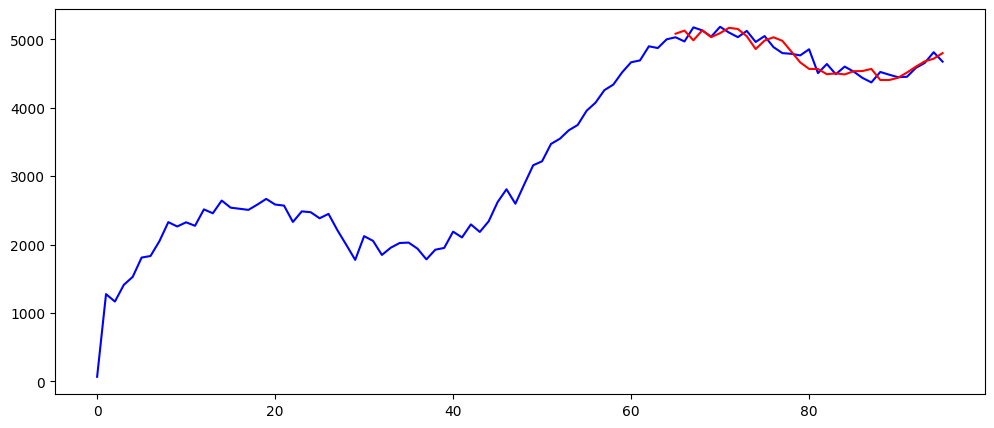

In [19]:
# Have a look how these models would have performed historically

plt.figure(figsize=(12, 5))

ax = weekly_prophet_nsteps_1[0][series_name].plot(color="blue")
ax = weekly_prophet_nsteps_1[0]["prophet_nsteps_1"].plot(color="red")

plt.show()

# 4 week out performance gain with each new week

In [20]:
#%%capture
weekly_prophet_nsteps_1 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=1, window_length=None
)
weekly_prophet_nsteps_2 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=2, window_length=None
)
weekly_prophet_nsteps_3 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=3, window_length=None
)
weekly_prophet_nsteps_4 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=4, window_length=None
)

100 % done


/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts[forecast_column].iloc[i] = prediction.iloc[i, 0]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI[lower_CI_column].iloc[i] = prediction.iloc[i, 1]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [21]:
#%%capture
weekly_prophet_out_4_nsteps_i = []

weekly_prophet_out_4_nsteps_1 = n_weeks_forecast(
    weekly_prophet_nsteps_1[0], nsteps=1, n_week_sum=4
)
weekly_prophet_out_4_nsteps_i.append(weekly_prophet_out_4_nsteps_1)

weekly_prophet_out_4_nsteps_2 = n_weeks_forecast(
    weekly_prophet_nsteps_2[0], nsteps=2, n_week_sum=4
)
weekly_prophet_out_4_nsteps_i.append(weekly_prophet_out_4_nsteps_2)

weekly_prophet_out_4_nsteps_3 = n_weeks_forecast(
    weekly_prophet_nsteps_3[0], nsteps=3, n_week_sum=4
)
weekly_prophet_out_4_nsteps_i.append(weekly_prophet_out_4_nsteps_3)

weekly_prophet_out_4_nsteps_4 = n_weeks_forecast(
    weekly_prophet_nsteps_4[0], nsteps=4, n_week_sum=4
)
weekly_prophet_out_4_nsteps_i.append(weekly_prophet_out_4_nsteps_4)

In [22]:
file_name = series_name + "_weekly_prophet_out_4_nsteps_i"
outfile = open(file_name, "wb")
pickle.dump(weekly_prophet_out_4_nsteps_i, outfile)
outfile.close()

In [23]:
performance_dfs = []

performance_df_out_4_nsteps_1 = performance_metrics(
    weekly_prophet_out_4_nsteps_1, performance_lag=12
)
performance_dfs.append(performance_df_out_4_nsteps_1)

performance_df_out_4_nsteps_2 = performance_metrics(
    weekly_prophet_out_4_nsteps_2, performance_lag=12
)
performance_dfs.append(performance_df_out_4_nsteps_2)

performance_df_out_4_nsteps_3 = performance_metrics(
    weekly_prophet_out_4_nsteps_3, performance_lag=12
)
performance_dfs.append(performance_df_out_4_nsteps_3)

performance_df_out_4_nsteps_4 = performance_metrics(
    weekly_prophet_out_4_nsteps_4, performance_lag=12
)
performance_dfs.append(performance_df_out_4_nsteps_4)

In [24]:
prophet_performance_df = pd.DataFrame()
for df in performance_dfs:
    prophet_performance_df = pd.concat([prophet_performance_df, df], axis=0)
prophet_performance_df = prophet_performance_df.reset_index().drop("index", axis=1)
prophet_performance_df

,model,mae,rmse,mape
0,prophet_nsteps_1,78.370058,96.138446,0.004324
1,prophet_nsteps_2,148.259731,180.650555,0.007763
2,prophet_nsteps_3,151.552091,198.266852,0.007992
3,prophet_nsteps_4,120.933938,142.920331,0.006422


# What's the 1 month out forecast error?

In [25]:
weekly_prophet_nsteps_4 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=4, window_length=None
)

100 % done


/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts[forecast_column].iloc[i] = prediction.iloc[i, 0]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI[lower_CI_column].iloc[i] = prediction.iloc[i, 1]
/Users/paul.carroll/Github/Forecasting_MS/src/Models/facebook_prophet.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [58]:
distr = weekly_distribution(app_data, series_name)

/Users/administrator/Documents/Milans_Forecasting_Repo/src/Prophet Scripts/../Functions/aggregate_functions.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dummy_data = dummy_data.groupby(


In [59]:
start = weekly_prophet_nsteps_4[0].iloc[:, 2].first_valid_index()
end = len(weekly_prophet_nsteps_4[0])
weekly_prophet_nsteps_4_trimmed = (
    weekly_prophet_nsteps_4[0].iloc[start:end].drop(columns=series_name, axis=1)
)
monthly_forecasts = weekly_to_monthly_summary(weekly_prophet_nsteps_4_trimmed, distr)

In [60]:
monthly_prophet_forecasts_df = resample(preprocess(app_data, series_name), "M").merge(
    monthly_forecasts, how="inner"
)
pm_prophet = performance_metrics(
    monthly_prophet_forecasts_df, performance_lag=40, summarise=False
)
pm_prophet

,Daily,dummy_series,prophet_nsteps_4,perc error,abs error,sq error
0,2022-04-30,21504.618775,21371.012945,0.006213,133.605829,1.785052e+04
1,2022-05-31,22746.782656,22782.729569,0.001580,35.946912,1.292181e+03
2,2022-06-30,21063.181391,21263.129908,0.009493,199.948517,3.997941e+04
3,2022-07-31,20492.983754,19961.136301,0.025953,531.847453,2.828617e+05
4,2022-08-31,20261.523462,20421.661577,0.007904,160.138115,2.564422e+04
5,2022-09-30,19026.182925,18973.356709,0.002777,52.826216,2.790609e+03
6,2022-10-31,20635.648092,23133.131834,0.121028,2497.483742,6.237425e+06


In [61]:
file_name = series_name + "_monthly_prophet_forecasts"
outfile = open(file_name, "wb")
pickle.dump(pm_prophet, outfile)
outfile.close()

# What's the 3 month out forecast error?

In [62]:
weekly_prophet_nsteps_12 = rolling_prophet(
    ts_data_weekly, window_end_date=weekly_measure_from, nsteps=12, window_length=None
)

100 % done


/Users/administrator/Documents/Milans_Forecasting_Repo/src/Prophet Scripts/../Models/facebook_prophet.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts[forecast_column].iloc[i] = prediction.iloc[i, 0]
/Users/administrator/Documents/Milans_Forecasting_Repo/src/Prophet Scripts/../Models/facebook_prophet.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI[lower_CI_column].iloc[i] = prediction.iloc[i, 1]
/Users/administrator/Documents/Milans_Forecasting_Repo/src/Prophet Scripts/../Models/facebook_prophet.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [63]:
distr = weekly_distribution(app_data, series_name)

/Users/administrator/Documents/Milans_Forecasting_Repo/src/Prophet Scripts/../Functions/aggregate_functions.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dummy_data = dummy_data.groupby(


In [64]:
start = weekly_prophet_nsteps_12[0].iloc[:, 2].first_valid_index()
end = len(weekly_prophet_nsteps_12[0])
weekly_prophet_nsteps_12_trimmed = (
    weekly_prophet_nsteps_12[0].iloc[start:end].drop(columns=series_name, axis=1)
)
tri_monthly_forecasts = weekly_to_monthly_summary(
    weekly_prophet_nsteps_12_trimmed, distr
)

In [65]:
monthly_prophet_forecasts_df = resample(preprocess(app_data, series_name), "M").merge(
    tri_monthly_forecasts, how="inner"
)
pm_prophet_3 = performance_metrics(
    monthly_prophet_forecasts_df, performance_lag=40, summarise=False
)
pm_prophet_3

,Daily,dummy_series,prophet_nsteps_12,perc error,abs error,sq error
0,2022-04-30,21504.618775,21338.615870,0.007719,166.002904,2.755696e+04
1,2022-05-31,22746.782656,22804.614561,0.002542,57.831905,3.344529e+03
2,2022-06-30,21063.181391,21245.102442,0.008637,181.921052,3.309527e+04
3,2022-07-31,20492.983754,19848.008656,0.031473,644.975098,4.159929e+05
4,2022-08-31,20261.523462,20353.502984,0.004540,91.979522,8.460233e+03
5,2022-09-30,19026.182925,18948.304163,0.004093,77.878762,6.065102e+03
6,2022-10-31,20635.648092,23141.141807,0.121416,2505.493715,6.277499e+06


In [66]:
file_name = series_name + "_3_monthly_prophet_forecasts"
outfile = open(file_name, "wb")
pickle.dump(pm_prophet_3, outfile)
outfile.close()

In [68]:
!jupyter nbconvert --to script prophet_outputs_dummy.ipynb
with open("prophet_outputs_dummy.py", "r") as f:
    lines = f.readlines()
with open("prophet_outputs_dummy.py", "w") as f:
    for line in lines:
        if "nbconvert --to script" in line:
            break
        else:
            f.write(line)

[NbConvertApp] Converting notebook prophet_outputs_dummy.ipynb to script
[NbConvertApp] Writing 6379 bytes to prophet_outputs_dummy.py
